# Module 3- Regression & Beta Calculation



### Query 3.1 
Import the file 'gold.csv', which is contains the data about last 2 years price action of Indian(MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'.

One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial function of the same inputs. Also, one of the 2 columns is partially filled.

<ul>
    <li>Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column.
    </li>
    <li>Also, try to fit the other column as well using a new linear regression model. Check if the predicitons are 
      accurate.
      Mention which column is a linear function and which is a polynomial function.
      (Hint: Plotting a histogram & distplot helps in recognizing the  discrepencies in prediction, if any.)
    </li>
</ul>

Coefficients = [ 2.  3. -1. -4.] 
Accuracy = 100.0 %

Coefficients = [ 1.01293825 -1.0003835   1.00503772 -1.01765453] 
Accuracy = 99.99886649319772 %


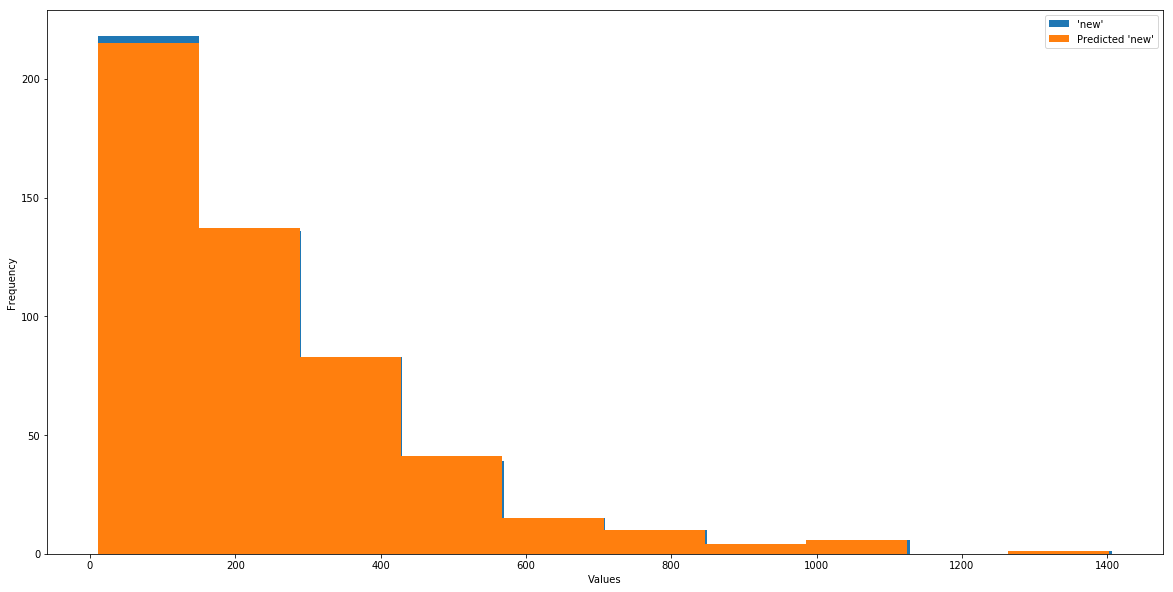

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
gold = pd.read_csv('GOLD.csv')
predictor = LinearRegression()
predictor.fit(gold[gold.Pred.notnull()][['Price','Open','High','Low']],gold[gold.Pred.notnull()].Pred)
print('Coefficients =',predictor.coef_,
      '\nAccuracy =',predictor.score(gold[gold.Pred.notnull()][['Price','Open','High','Low']],gold[gold.Pred.notnull()].Pred)*100,'%')
gold['Pred'] = predictor.predict(gold[['Price','Open','High','Low']])

predictor2 = LinearRegression()
predictor2.fit(gold[['Price','Open','High','Low']],gold.new)
print('\nCoefficients =',predictor2.coef_,
      '\nAccuracy =',predictor2.score(gold[['Price','Open','High','Low']],gold.new)*100,'%')
p_new = predictor2.predict(gold[['Price','Open','High','Low']])
fig,ax = plt.subplots(figsize=(20,10))
plt.hist(gold.new)
plt.hist(p_new)
plt.legend(['\'new\'','Predicted \'new\''])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


# Column 'new' is a polynomial function of the inputs.
# Column 'Pred' is a linear function of the inputs.

### Query 3.2 
Import the stock of your choosing AND the Nifty index. <br>
Using linear regression (OLS), calculate -
<ul>
    <li>The daily Beta value for the past 3 months. (Daily= Daily returns)</li>
    <li>The monthly Beta value. (Monthly= Monthly returns)</li>
</ul>
Refrain from using the (covariance(x,y)/variance(x)) formula. <br>
Attempt the question using regression.(Regression Reference) <br>
Were the Beta values more or less than 1 ? What if it was negative ? <br>
Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results

In [2]:
nifty = pd.read_csv('Nifty50.csv')
tcs = pd.read_csv('TCS.csv')
tcs = tcs[tcs.Series == 'EQ']
nifty['Daily Return'] = nifty.Close.rolling(2).apply(lambda x: x[-1] - x[0],raw ='False')
tcs['Daily Return'] = tcs['Close Price'].rolling(2).apply(lambda x: x[-1] - x[0],raw='False')
nifty['Daily Return'].fillna(0,inplace=True)
tcs['Daily Return'].fillna(0,inplace=True)

daily = LinearRegression()
daily.fit(np.array(nifty.tail(90)['Daily Return']).reshape(-1,1),tcs.tail(90)['Daily Return'])
daily_beta = daily.coef_
print('Daily Beta =',daily_beta)

nifty_monthly_return = nifty.Close.rolling(30).apply(lambda x: x[-1] - x[0],raw='False')
tcs_monthly_return = tcs['Close Price'].rolling(30).apply(lambda x: x[-1] - x[0],raw='False')
nifty_monthly_return.fillna(0,inplace=True)
tcs_monthly_return.fillna(0,inplace=True)

monthly = LinearRegression()
monthly.fit(np.array(nifty_monthly_return).reshape(-1,1),tcs_monthly_return)
monthly_beta = monthly.coef_
print('Monthly Beta =',monthly_beta)

# The Beta values are less than 1
# If Beta is negative that means that the stock goes high when the market is low and goes low when the market is high.

# We can conclude from the calculated Beta values (using Regression) that the stock TCS is not much affected by the way
# market changes. It is has low risk but the returns are low too.
# The losses are low when the market is down but the same applies on the profit when the market is up.

Daily Beta = [0.13538675]
Monthly Beta = [0.19670579]
